<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
# !wget -c 'https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/export?format=csv&gid?usp=sharing' -O 2019_nCoV_data.csv
# !mkdir /content/2019_nCoV_data/
# !mv 2019_nCoV_data.csv /content/2019_nCoV_data/
# !pwd
# !ls -l


In [16]:
# Reading the dataset
# https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-02-2020.csv')
df.head(80)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-02T15:03:23,67103,2803,33934,30.9756,112.2707
1,NaN,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000
2,NaN,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000
3,NaN,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-02T15:03:23,1350,7,1059,23.3417,113.4244
...,...,...,...,...,...,...,...,...
75,NaN,Denmark,2020-03-01T23:33:03,4,0,0,56.2639,9.5018
76,NaN,Pakistan,2020-02-29T18:03:05,4,0,0,30.3753,69.3451
77,"Cook County, IL",US,2020-03-02T20:33:02,4,0,2,41.7377,-87.6976
78,"Snohomish County, WA",US,2020-03-02T20:53:02,4,1,0,48.0330,-121.8339


In [17]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 8 columns):
Province/State    74 non-null object
Country/Region    141 non-null object
Last Update       141 non-null object
Confirmed         141 non-null int64
Deaths            141 non-null int64
Recovered         141 non-null int64
Latitude          141 non-null float64
Longitude         141 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.9+ KB


In [18]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,640.489362,21.879433,323.418440,31.822450,29.574230
std,5657.626507,236.012696,2859.175129,20.480052,87.769878
min,0.000000,0.000000,0.000000,-41.454500,-123.869500
25%,1.000000,0.000000,0.000000,26.078900,-19.020800
50%,6.000000,0.000000,1.000000,35.745200,35.862300
75%,91.000000,1.000000,30.000000,43.073100,112.270700
max,67103.000000,2803.000000,33934.000000,64.963100,174.886000


In [19]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['Mainland China', 'South Korea', 'Italy', 'Iran', 'Others', 'Japan', 'France', 'Germany', 'Spain', 'Singapore', 'Hong Kong', 'Kuwait', 'Bahrain', 'US', 'Thailand', 'Switzerland', 'Taiwan', 'UK', 'Malaysia', 'Iraq', 'Norway', 'United Arab Emirates', 'Austria', 'Netherlands', 'Canada', 'Vietnam', 'Sweden', 'Lebanon', 'Israel', 'Macau', 'Australia', 'Belgium', 'San Marino', 'Croatia', 'Greece', 'Ecuador', 'Finland', 'Iceland', 'Oman', 'India', 'Mexico', 'Denmark', 'Pakistan', 'Algeria', 'Azerbaijan', 'Czech Republic', 'Georgia', 'Philippines', 'Qatar', 'Romania', 'Russia', 'Brazil', 'Egypt', 'Indonesia', 'Portugal', 'Afghanistan', 'Andorra', 'Armenia', 'Belarus', 'Cambodia', 'Dominican Republic', 'Estonia', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Monaco', 'Morocco', 'Nepal', 'New Zealand', 'Nigeria', 'North Macedonia', 'Saudi Arabia', 'Senegal', 'Sri Lanka']

Total countries affected by virus:  75


In [20]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'South Korea', 'Italy', 'Iran', 'Others', 'Japan', 'France', 'Germany', 'Spain', 'Singapore', 'Hong Kong', 'Kuwait', 'Bahrain', 'US', 'Thailand', 'Switzerland', 'Taiwan', 'UK', 'Malaysia', 'Iraq', 'Norway', 'United Arab Emirates', 'Austria', 'Netherlands', 'Canada', 'Vietnam', 'Sweden', 'Lebanon', 'Israel', 'Macau', 'Australia', 'Belgium', 'San Marino', 'Croatia', 'Greece', 'Ecuador', 'Finland', 'Iceland', 'Oman', 'India', 'Mexico', 'Denmark', 'Pakistan', 'Algeria', 'Azerbaijan', 'Czech Republic', 'Georgia', 'Philippines', 'Qatar', 'Romania', 'Russia', 'Brazil', 'Egypt', 'Indonesia', 'Portugal', 'Afghanistan', 'Andorra', 'Armenia', 'Belarus', 'Cambodia', 'Dominican Republic', 'Estonia', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Monaco', 'Morocco', 'Nepal', 'New Zealand', 'Nigeria', 'North Macedonia', 'Saudi Arabia', 'Senegal', 'Sri Lanka']

Total countries affected by virus:  75


In [26]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())

cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]
global_cases.sort_values(['Deaths'], ascending=False)



,Confirmed,Deaths
Country/Region,,
China,80026,2912
Iran,1501,66
Italy,2036,52
South Korea,4335,28
Japan,274,6
US,101,6
Others,705,6
France,191,3
Hong Kong,100,2


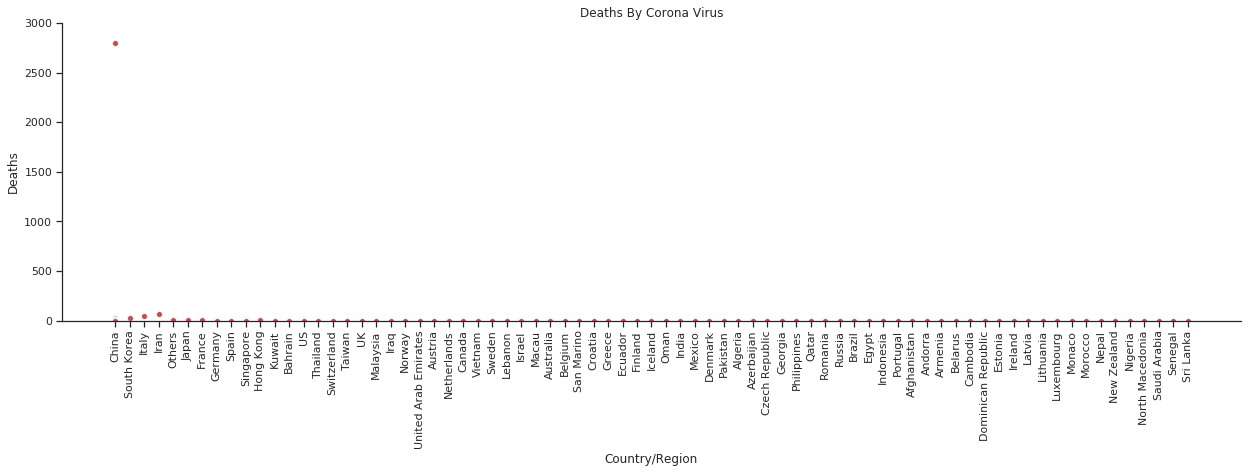

In [132]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style("darkgrid")
sns.set(style="ticks")
ax = sns.relplot(x="Country/Region", y="Deaths", aspect = 3.5, color="r", data=df)
ax.set(ylim=(0, 3000))
#ax.set(xlim=(0,200))
plt.title('Deaths By Corona Virus')
ax.set_xticklabels(rotation=90)


Text(0.5, 1.0, 'Deaths By Corona Virus')

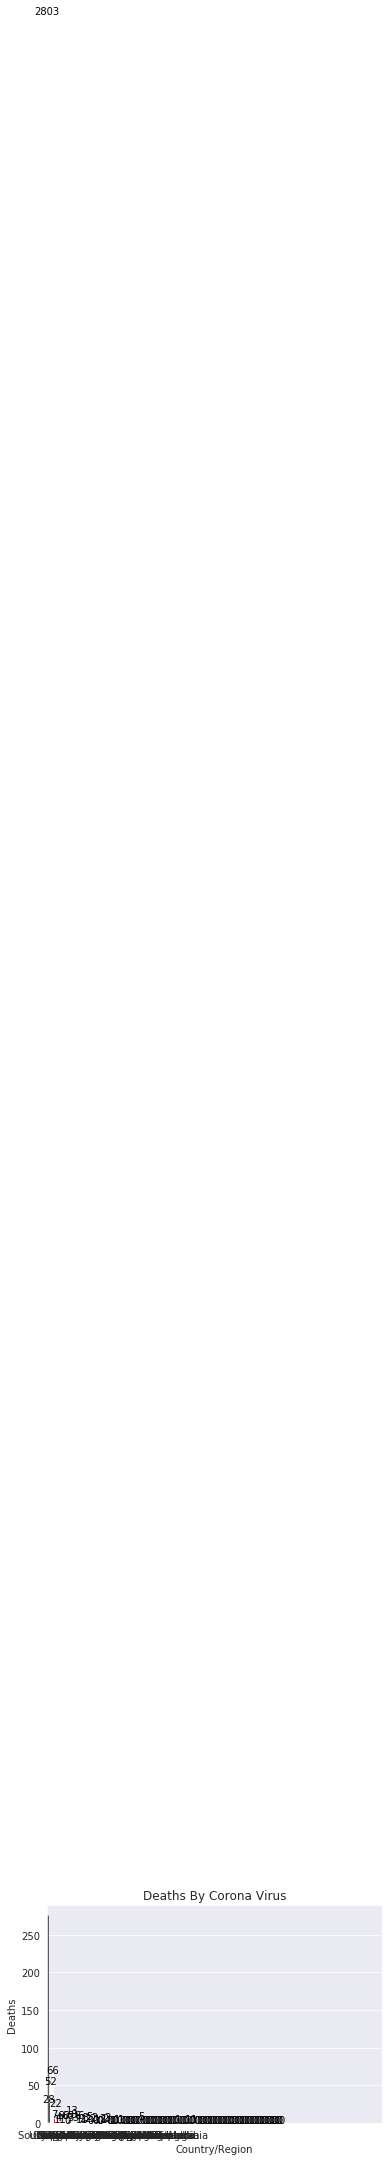